In [9]:
%matplotlib inline
from tensorscaling import scale, capacity, unit_tensor, random_tensor, marginal, random_unitary
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt

# Tensor scaling

Scale 3x3x3 unit tensor to certain non-uniform marginals:

In [2]:
shape = [3, 3, 3]
targets = [(.5, .25, .25), (.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-4)
res

Result(success=True, iterations=50, max_dist=7.861635178365405e-05, ...)

We can also access the scaling matrices and the final scaled state:

In [3]:
print(res.gs[0], "\n")
print(res.gs[1], "\n")
print(res.gs[2])

[[-0.04785049-0.63793134j -0.6871577 +0.63822871j  0.27628006-0.83834036j]
 [ 0.25349947+0.27155767j  0.17091046+0.64707608j  0.14818049+0.0413024j ]
 [ 0.34882605-0.00382517j -0.3286495 +0.05253937j -0.6256997 +0.05158141j]] 

[[-0.70838497-0.43018289j  0.24491454+0.6260663j  -0.4954863 -0.3956961j ]
 [-0.78174416+0.0356988j  -0.35347503-0.48714436j  0.05565846-0.35197169j]
 [ 0.56847822+0.16320036j -0.15357539-0.36337714j -0.5001304 -0.22604811j]] 

[[-0.47311089-0.77251215j  0.76170002-0.11949307j  0.5630195 -0.81886679j]
 [ 0.26657418-0.27510304j -0.40995505-0.14446292j  0.05969138-0.29922137j]
 [ 0.29881971-0.03916367j  0.20449757+0.02144905j -0.33479473-0.10816733j]]


Let's now check that the W tensor *cannot* be scaled to uniform marginals:

In [4]:
shape = [2, 2, 2, 2]
W = np.zeros(shape)
W[1, 0, 0, 0] = W[0, 1, 0, 0] = W[0, 0, 1, 0] = W[0, 0, 0, 1] = .5
targets = [(.5, .5)] * 4

scale(W, targets, eps=1e-4, max_iterations=1000)

Result(success=False, iterations=1000, max_dist=0.5934653559719874, ...)

To see more clearly what is going on, we can set the `verbose` flag:

In [5]:
res = scale(W, targets, eps=1e-4, max_iterations=10, verbose=True)

scaling tensor of shape (2, 2, 2, 2) and type float64
target spectra:
  0: (0.5, 0.5)
  1: (0.5, 0.5)
  2: (0.5, 0.5)
  3: (0.5, 0.5)
#000: max_dist = 0.35355339 @ sys = 1
#001: max_dist = 0.47140452 @ sys = 0
#002: max_dist = 0.56568542 @ sys = 2
#003: max_dist = 0.62853936 @ sys = 3
#004: max_dist = 0.58232323 @ sys = 1
#005: max_dist = 0.59305730 @ sys = 0
#006: max_dist = 0.59545834 @ sys = 2
#007: max_dist = 0.59262283 @ sys = 3
#008: max_dist = 0.59353004 @ sys = 1
#009: max_dist = 0.59357133 @ sys = 0
#010: max_dist = 0.59340661 @ sys = 2
did not converge!


We see that at each point in the algorithm, one of the marginals has Frobenius distance $\approx 0.59$ to being uniform. Indeed, we know that the entanglement polytope of the W tensor does not include the point corresponding to uniform marginals -- see [here](https://www.entanglement-polytopes.org/four_qubits) for an interactive visualization!

# Tuples of matrices and tensors

We can just as well only prescribe the desired spectra for subsystems.
Note that prescribing two out of three marginals amounts to *operator scaling*.

In [6]:
shape = [3, 3, 3]
targets = [(.4, .3, .3), (.7, .2, .1)]

res = scale(unit_tensor(3, 3), targets, eps=1e-6)
res

Result(success=True, iterations=45, max_dist=7.239213806831911e-07, ...)

Indeed, the last two marginals are as prescribed, while the first marginal is arbitrary.

In [7]:
print(marginal(res.psi, 0).round(5), "\n")
print(marginal(res.psi, 1).round(5), "\n")
print(marginal(res.psi, 2).round(5))

[[ 3.1197e-01+0.j      -3.8000e-04-0.00068j -2.9800e-03+0.02212j]
 [-3.8000e-04+0.00068j  3.0031e-01+0.j      -1.6100e-03-0.00198j]
 [-2.9800e-03-0.02212j -1.6100e-03+0.00198j  3.8773e-01+0.j     ]] 

[[ 0.4+0.j -0. +0.j -0. -0.j]
 [-0. -0.j  0.3+0.j  0. -0.j]
 [-0. +0.j  0. +0.j  0.3+0.j]] 

[[ 0.7+0.j  0. -0.j -0. +0.j]
 [ 0. +0.j  0.2+0.j  0. -0.j]
 [-0. +0.j  0. +0.j  0.1+0.j]]


**Code to make:**

1. Allow different Gaussians. 
2. Convert a psd matrix into a channel (or tensor) in order to scale it
2. Get a tensor scaling algorithm that actually computes the capacity: idea would be to convert to the format where you keep track the scaling the entire time instead of multiplying many times. Then take product of determinants at the end. **done**
3. Exponentiate and graph. **done**
4. Compare to optimal transport




**Convert PSD into channel:** Or exponentiate a tensor. Need to create *some* Kraus for this to work. Can use, e.g., the spectral decomposition of the state. That's probably the right thing - take random unitaries (how to get these? by scaling, I guess). Issue with random unitaries right now: they are shaped incorrectly. How to reshape? 

In [2]:
#test some reshaping.
b = np.zeros(4)
print(b)
b.reshape([2,2])
u = random_unitary(4)
u.reshape([4,2,2])
# want to get the rows of the unitary to be the Kraus operators. So it's really more like 

[0. 0. 0. 0.]


array([[[-0.15641792+0.62467079j, -0.55961563-0.48782393j],
        [-0.01653412-0.03556598j, -0.12593645+0.12953647j]],

       [[ 0.0879969 -0.16055018j, -0.09406316-0.30520915j],
        [-0.22971306+0.71088406j,  0.55278453+0.02801266j]],

       [[ 0.39952305+0.21474247j,  0.17557352-0.14378984j],
        [-0.35533635+0.14799823j, -0.35401903-0.6850318j ]],

       [[ 0.11786672-0.57634579j, -0.43419263-0.32685293j],
        [-0.2048103 -0.50022274j,  0.12897951-0.22309443j]]])

maybe the below is total junk...can we always assume kraus operators are orthogonal?

spectrum: [-1.50398224  0.20968467 -0.80990187  0.12840686]
eigenvectors: [[[-6.33210118e-14-7.85769536e-15j -1.62249988e-14-2.59260780e-14j]
  [-2.86788617e-14-2.01630993e-14j  2.89913943e-14+1.97705364e-14j]]

 [[-1.69372379e+01+6.66007890e+00j -2.88700649e+01-2.92511599e+01j]
  [ 3.57359189e+01+1.22723156e+01j -3.03337319e+01-4.81545937e+00j]]

 [[-9.83554065e-09+7.25253738e-10j  3.32315888e-09+1.53872446e-09j]
  [-1.00359511e-08-5.86952405e-08j -2.41783212e-08-6.54317402e-08j]]

 [[-5.51025540e-01-2.53575244e-01j  9.54231138e-02+6.92389187e-01j]
  [ 1.52974858e-01+2.66148747e-01j -2.05064709e-01-8.52883084e-02j]]]
capacities:


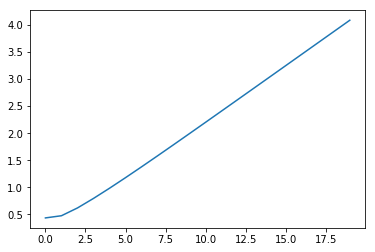

In [61]:
targets = [(.5, .5), (.5,.5)]
rando = random_unitary(4).reshape([4,2,2])
caps = []
spec = np.random.randn(4)
print("spectrum:", spec)
spec = np.exp(spec)
for j in range(0,20):
    for i in range(0,3):
        rando[i]*=spec[i]
    caps.append(capacity(rando, targets, eps=1e-4, max_iterations=400,randomize=False, verbose=False))
print("eigenvectors:", rando)
print("capacities:")
plt.plot(caps)



In [24]:
np.exp(2*np.array([1,2]))

array([ 7.3890561 , 54.59815003])

In [6]:
4**(1/2)

2.0

In [5]:
random_unitary(4).shape()

TypeError: 'tuple' object is not callable